# Probability Estimation via Scoring


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from properscoring import crps_ensemble

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, brier_score_loss
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Paper Page 21

There are various methods in machine learning for inducing probabilistic predictors.
These are hypotheses $h$ that do not merely output point predictions $h(\vec{x}) \in \mathcal{Y}$, 
i.e., elements of the output space $\mathcal{Y}$, 
but probability estimates $p_h(\cdot \vert \vec{x}) =  p(\cdot \vert \vec{x}, h)$, 
i.e., complete probability distributions on $\mathcal{Y}$. 
In the case of classification, 
this means predicting a single (conditional) probability $p_h(y \vert \vec{x}) = p(y \vert \vec{x} , h)$ for each class $y \in \mathcal{Y}$, 
whereas in regression, $p( \cdot \vert \vec{x}, h)$ is a density function on $\mathbb{R}$. 
Such predictors can be learned in a discriminative way, 
i.e., in the form of a mapping $\vec{x} \mapsto p( \cdot \vert \vec{x})$, 
or in a generative way, which essentially means learning a joint distribution on $\mathcal{X} \times \mathcal{Y}$. 
Moreover, the approaches can be parametric (assuming specific parametric families of probability distributions) or non-parametric. 
Well-known examples include classical statistical methods such as logistic and linear regression, 
Bayesian approaches such as Bayesian networks and Gaussian processes, <!-- (cf.\ Section \ref{sec:gp}),  -->
as well as various techniques in the realm of (deep) neural networks. 
<!-- (cf.\ Section \ref{sec:m1}).  -->

## 1. Example: Logistic Regression

Logistic regression is a widely used supervised machine learning method for binary classification that provides probabilistic outputs. 
Below is an example using `scikit-learn`.

In [12]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8500


## 2. Example: Linear Regression

In statistics, linear regression is a statistical model used for predicting a continuous target variable.

In [15]:
## Example: Linear Regression
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0107


## 3. Example: Bayesian networks

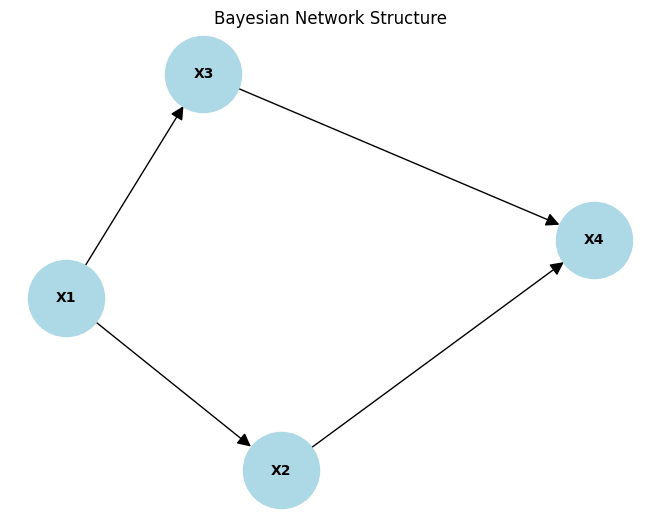

+-------+-----------+
| X4    |   phi(X4) |
+=======+===========+
| X4(0) |    0.4500 |
+-------+-----------+
| X4(1) |    0.5500 |
+-------+-----------+


In [21]:
#  (UAIML: Slides 31&32)
model = BayesianNetwork([('X1', 'X2'), ('X1', 'X3'), ('X2', 'X4'), ('X3', 'X4')])

cpd_X1 = TabularCPD(variable='X1', variable_card=2, values=[[0.6], [0.4]])
cpd_X2 = TabularCPD(variable='X2', variable_card=2, values=[[0.7, 0.2], [0.3, 0.8]], evidence=['X1'], evidence_card=[2])
cpd_X3 = TabularCPD(variable='X3', variable_card=2, values=[[0.8, 0.5], [0.2, 0.5]], evidence=['X1'], evidence_card=[2])
cpd_X4 = TabularCPD(variable='X4', variable_card=2, values=[[0.9, 0.4, 0.7, 0.1], [0.1, 0.6, 0.3, 0.9]], evidence=['X2', 'X3'], evidence_card=[2, 2])

model.add_cpds(cpd_X1, cpd_X2, cpd_X3, cpd_X4)

assert model.check_model()

G = nx.DiGraph()
G.add_nodes_from(['X1', 'X2', 'X3', 'X4'])
G.add_edges_from([('X1', 'X2'), ('X1', 'X3'), ('X2', 'X4'), ('X3', 'X4')])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title("Bayesian Network Structure")
plt.show()

inference = VariableElimination(model)

result = inference.query(variables=['X4'], evidence={'X1': 1})

print(result)

## 4. Example: Gaussian Processes

## 5. Example: (Deep) Neural Networks

Training probabilistic predictors is typically accomplished by minimizing suitable loss functions, 
i.e., loss functions that enforce "correct" (conditional) probabilities as predictions. 
In this regard, 
proper scoring rules ({cite:t}`gnei_sp05`) 
play an important role, 
including the log-loss as a well-known special case. 
Sometimes, however, estimates are also obtained in a very simple way, 
following basic frequentist techniques for probability estimation, 
like in Naïve Bayes or nearest neighbor classification. 

## 6. Example: Naïve Bayes

In [ ]:
# (UAIML: Slides 30)

## 7. Example: Nearest Neighbor Classification

## Logarithmic Scoring Rule

In [3]:
y_true = np.array([1, 1, 0])

p_pred = np.array([0.8, 0.3, 0.6])

log_score = -np.mean(np.log(p_pred[y_true == 1]))
print(f"Log Score: {log_score:.4f}")

Log Score: 0.7136


## Brier Score

In [5]:
y_true = np.array([1, 1, 0])

p_pred = np.array([0.8, 0.3, 0.6])

brier_score = brier_score_loss(y_true, p_pred)
print(f"Brier Score: {brier_score:.4f}")


Brier Score: 0.2967


## Continuous Ranked Probability Score

In [8]:
y_true = np.array([3.5])

predicted_ensemble = np.array([[3.0, 3.2, 3.4, 3.6, 3.8]])

crps_score = crps_ensemble(y_true, predicted_ensemble)
print(f"Continuous Ranked Probability Score: {crps_score.mean():.4f}")


Continuous Ranked Probability Score: 0.1000
